In [45]:
# import ibraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [22]:
df = pd.read_csv('AllBooks_baseline_DTM_Labelled.csv',index_col=0)
df

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
Buddhism_Ch1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Buddhism_Ch2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Buddhism_Ch3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Buddhism_Ch4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Buddhism_Ch5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BookOfWisdom_Ch15,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BookOfWisdom_Ch16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BookOfWisdom_Ch17,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BookOfWisdom_Ch18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# extract the 
list_of_text = df.index
list_of_text

Index(['Buddhism_Ch1', 'Buddhism_Ch2', 'Buddhism_Ch3', 'Buddhism_Ch4',
       'Buddhism_Ch5', 'Buddhism_Ch6', 'Buddhism_Ch7', 'Buddhism_Ch8',
       'Buddhism_Ch9', 'Buddhism_Ch10',
       ...
       'BookOfWisdom_Ch10', 'BookOfWisdom_Ch11', 'BookOfWisdom_Ch12',
       'BookOfWisdom_Ch13', 'BookOfWisdom_Ch14', 'BookOfWisdom_Ch15',
       'BookOfWisdom_Ch16', 'BookOfWisdom_Ch17', 'BookOfWisdom_Ch18',
       'BookOfWisdom_Ch19'],
      dtype='object', length=590)

In [24]:
# check sipecific observations, declare a dic
books = {}

for text in list_of_text:
    split_book = text.split("_")
    book = split_book[0]
     
    #check if book in dic
    if book in books:
        books[book] += 1
    else:
        books[book] = 1

In [25]:
books

{'Buddhism': 46,
 'TaoTeChing': 81,
 'Upanishad': 162,
 'YogaSutra': 189,
 'BookOfProverb': 31,
 'BookOfEcclesiastes': 12,
 'BookOfEccleasiasticus': 50,
 'BookOfWisdom': 19}

In [26]:
# process of training model
# 1. declare model
# 2. fit data to model
# 3. perform prediction

# kmeans need to declare the number of cluster of our dataset, no idea how many so start with 3
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(df)
k_fit

KMeans(n_clusters=4)

In [27]:
new_df = pd.DataFrame(df.index)

new_df['pred_label'] = k_fit.predict(df)

new_df



,0,pred_label
0,Buddhism_Ch1,1
1,Buddhism_Ch2,1
2,Buddhism_Ch3,1
3,Buddhism_Ch4,1
4,Buddhism_Ch5,1
...,...,...
585,BookOfWisdom_Ch15,1
586,BookOfWisdom_Ch16,3
587,BookOfWisdom_Ch17,1
588,BookOfWisdom_Ch18,3


In [29]:
# rename the columns in new_df
new_df.columns = ['text','pred_labels']
new_df

,text,pred_labels
0,Buddhism_Ch1,1
1,Buddhism_Ch2,1
2,Buddhism_Ch3,1
3,Buddhism_Ch4,1
4,Buddhism_Ch5,1
...,...,...
585,BookOfWisdom_Ch15,1
586,BookOfWisdom_Ch16,3
587,BookOfWisdom_Ch17,1
588,BookOfWisdom_Ch18,3


In [33]:
# decalare multiple columns
new_df[['split_text','chapter']] = new_df['text'].str.split("_", expand = True)
new_df

,text,pred_labels,split_text,chapter
0,Buddhism_Ch1,1,Buddhism,Ch1
1,Buddhism_Ch2,1,Buddhism,Ch2
2,Buddhism_Ch3,1,Buddhism,Ch3
3,Buddhism_Ch4,1,Buddhism,Ch4
4,Buddhism_Ch5,1,Buddhism,Ch5
...,...,...,...,...
585,BookOfWisdom_Ch15,1,BookOfWisdom,Ch15
586,BookOfWisdom_Ch16,3,BookOfWisdom,Ch16
587,BookOfWisdom_Ch17,1,BookOfWisdom,Ch17
588,BookOfWisdom_Ch18,3,BookOfWisdom,Ch18


In [43]:
unique_texts = new_df['split_text'].unique()
unique_texts

array(['Buddhism', 'TaoTeChing', 'Upanishad', 'YogaSutra',
       'BookOfProverb', 'BookOfEcclesiastes', 'BookOfEccleasiasticus',
       'BookOfWisdom'], dtype=object)

In [44]:
new_df[new_df['split_text'] == 'TaoTeChing']['pred_labels'].value_counts()

1    81
Name: pred_labels, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


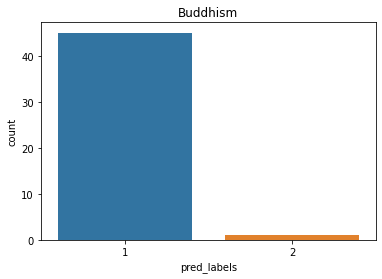

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


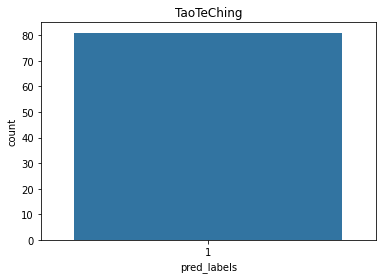

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


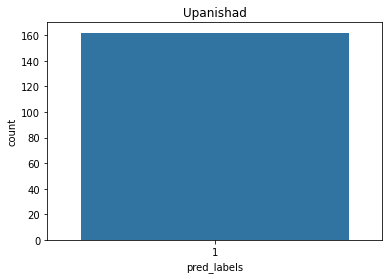

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


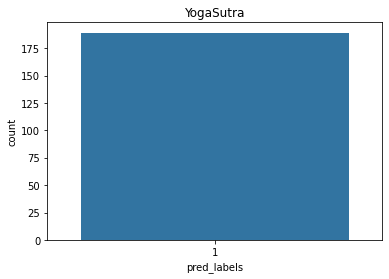

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


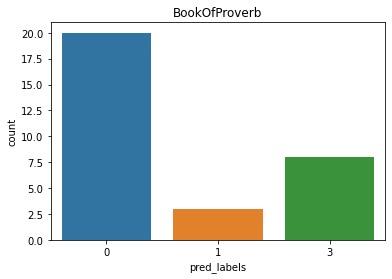

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


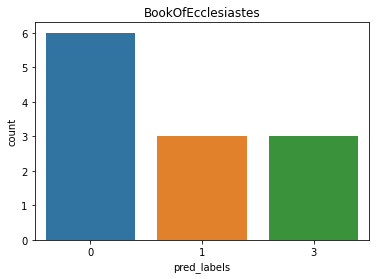

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


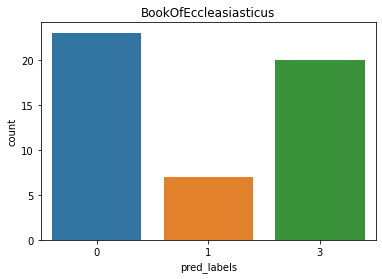

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


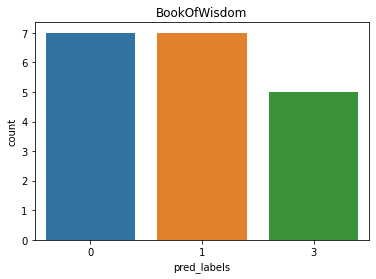

In [47]:
for text in unique_texts:
    # get temportary df based what text is in loop
    temp_df = new_df[new_df['split_text'] == text]
    sns.countplot(temp_df['pred_labels'])
    plt.title(text)
    plt.show()

In [48]:
k_fit.inertia_

119090.00905432618

In [49]:
kmeans_2 =KMeans(n_clusters=3)
k_fit_2 = kmeans_2.fit(df)
k_fit_2

KMeans(n_clusters=3)

In [50]:
k_fit_2.inertia_

124758.63867990552

In [51]:
inertias = []

for n in range(1,16):
    temp_kmeans = KMeans(n_clusters=n)
    temp_k_fit = temp_kmeans.fit(df)
    inertias.append(temp_k_fit.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


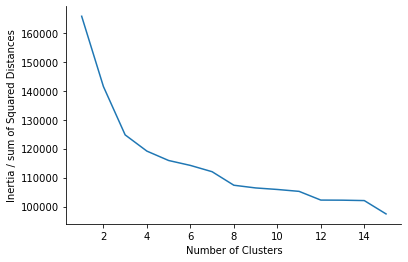

In [54]:
# plot iertia vs cluster number
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia / sum of Squared Distances')
plt.plot(range(1,16),inertias)
sns.despine()   # makes your plot look nicer

In [74]:
# wordcloud
with open("Complete_data .txt",'r',encoding='utf-8', errors='ignore') as f:
    line = f.readlines()
    
line

['0.1\n',
 ' 1.The Buddha: "What do you think, Rahula: What is a mirror for?"The Buddha:Rahula: "For reflection, sir."Rahula:The Buddha: "In the same way, Rahula, bodily acts, verbal acts, & mental acts are to be done with repeated reflection.The Buddha:"Whenever you want to perform a bodily act, you should reflect on it: \'This bodily act I want to perform  would it lead to self-affliction, to the affliction of others, or to both? Is it an unskillful bodily act, with painful consequences, painful results?\' If, on reflection, you know that it would lead to self-affliction, to the affliction of others, or to both; it would be an unskillful bodily act with painful consequences, painful results, then any bodily act of that sort is absolutely unfit for you to do. But if on reflection you know that it would not cause affliction... it would be a skillful bodily act with happy consequences, happy results, then any bodily act of that sort is fit for you to do.(Similarly with verbal acts & men

In [75]:
chapter = []
lines = []

for row in range(len(line)):
    if row % 2 ==0:
        chapter.append(line[row].strip())
    else:
        lines.append(line[row])

In [76]:
text_df = pd.DataFrame({'chapter':chapter,'line':lines})
text_df

,chapter,line
0,0.1,"1.The Buddha: ""What do you think, Rahula: Wha..."
1,0.2,2.Once the Blessed One was staying at Kosambi...
2,0.3,"3.""'Stress should be known. The cause by whic..."
3,0.4,"4.""Vision arose, clear knowing arose, discern..."
4,0.5,"5.Sariputta: ""There are these three forms of ..."
...,...,...
585,7.15,condemning both the makers and the worshippers...
586,7.16,"worthily punished, and were destroyed by a mul..."
587,7.17,"17:1. For thy judgments, O Lord, are great, a..."
588,7.18,"intercession, in the sedition on occasion of C..."


In [79]:
import wordcloud